**1. Load DataSet**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

from google.colab import files
uploaded = files.upload()

df = pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")

print("✅ Dataset Loaded Successfully!\n")

Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data.xlsx
✅ Dataset Loaded Successfully!



**2. Clean Dataset**

In [57]:
print("Dataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

df.fillna({
    'price': df['price'].median(),
    'reviews_per_month': 0
}, inplace=True)

df.drop_duplicates(inplace=True)

print("\n✅ Cleaned dataset shape:", df.shape)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101788 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host name                       101652 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null

**3. Average Price by Room Type**

/tmp/ipython-input-1506760564.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_price.values, y=room_price.index, palette="viridis")


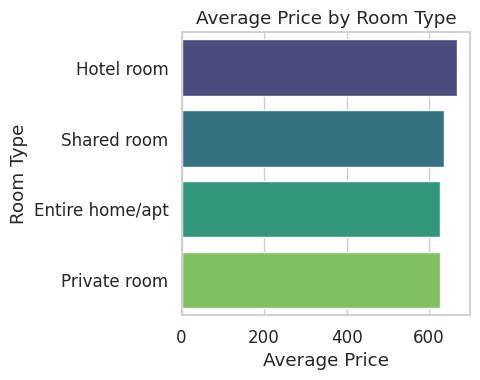

In [68]:
room_price = df.groupby('room type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,4))
sns.barplot(x=room_price.values, y=room_price.index, palette="viridis")
plt.title("Average Price by Room Type")
plt.xlabel("Average Price")
plt.ylabel("Room Type")
plt.tight_layout()
plt.show()

**4. Top 10 Hosts by Listings Count**

/tmp/ipython-input-1535827355.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_counts.values, y=host_counts.index, palette="plasma")


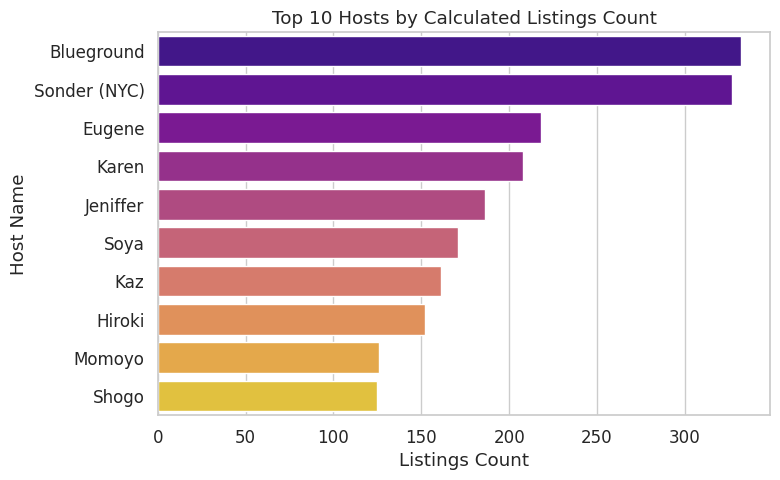

In [12]:
host_counts = (
    df.groupby('host name')['calculated host listings count']
    .max()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=host_counts.values, y=host_counts.index, palette="plasma")
plt.title("Top 10 Hosts by Calculated Listings Count")
plt.xlabel("Listings Count")
plt.ylabel("Host Name")
plt.tight_layout()
plt.show()

**5. Relationships Between Numerical Variables**

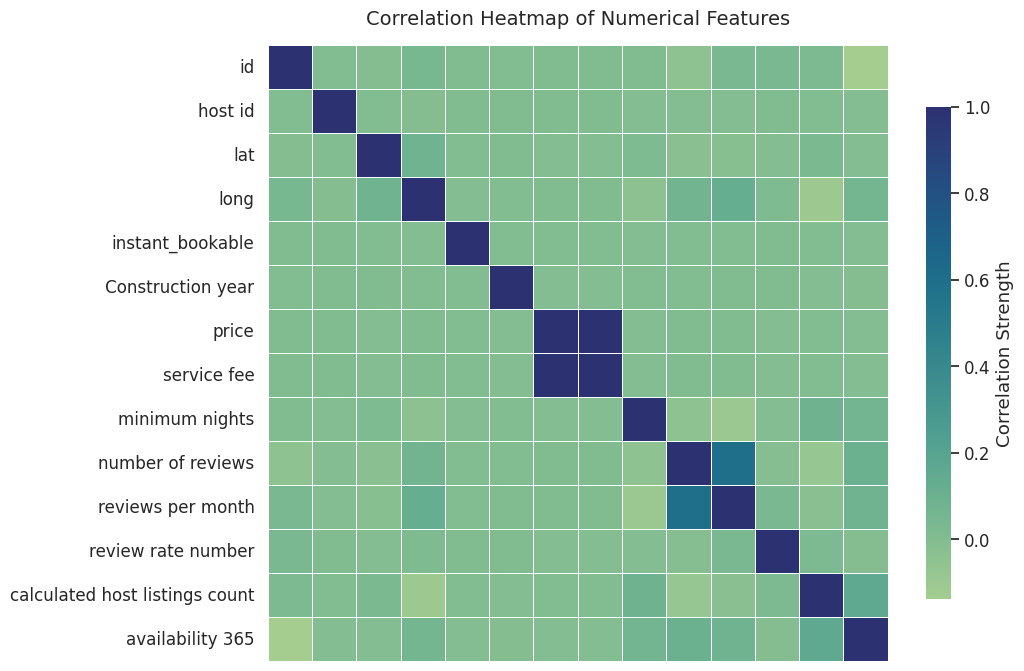

In [67]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="crest",
    linewidths=0.4,
    cbar_kws={"shrink": 0.8, "label": "Correlation Strength"}
)

plt.xticks([], [])
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, pad=15)
plt.show()


**6. Price Distribution by Room Type**

/tmp/ipython-input-3938575195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room type', y='price', data=df, palette="flare")


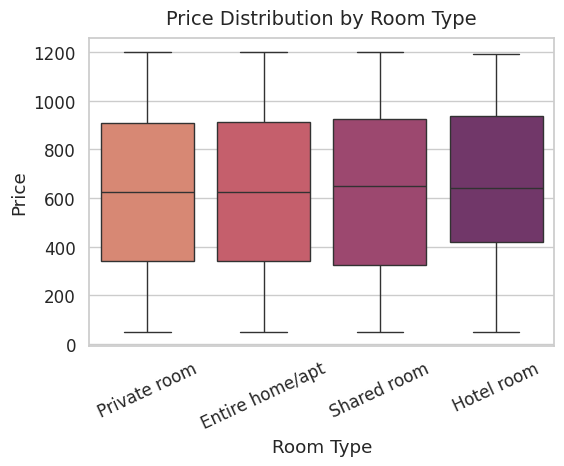

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x='room type', y='price', data=df, palette="flare")
plt.title("Price Distribution by Room Type", fontsize=14, pad=10)
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.xticks(rotation=25)
plt.show()

**7. Room Type Proportion**

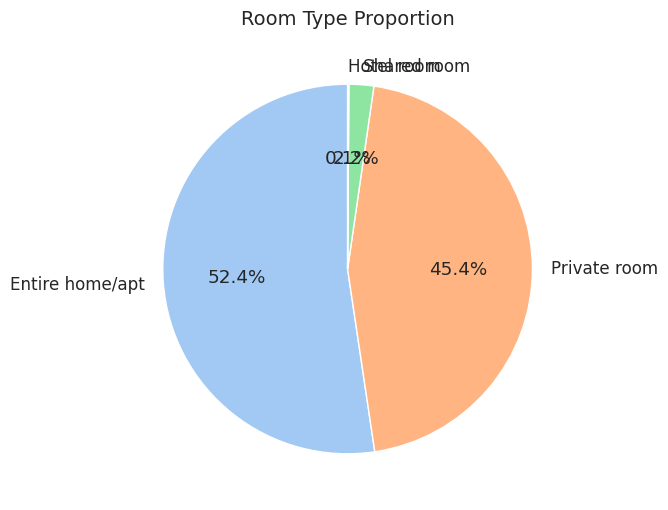

In [66]:
room_counts = df['room type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Room Type Proportion", fontsize=14, pad=10)
plt.show()


**8. Average Reviews per Price**

/tmp/ipython-input-3044247639.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_reviews.values, y=avg_reviews.index, palette="coolwarm")


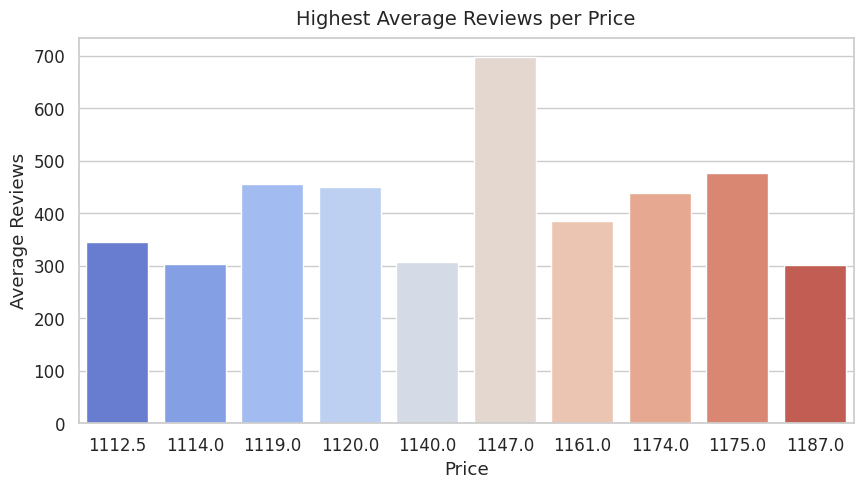

In [45]:
avg_reviews = df.groupby('number of reviews')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_reviews.values, y=avg_reviews.index, palette="coolwarm")
plt.title("Highest Average Reviews per Price", fontsize=14, pad=10)
plt.xlabel("Price")
plt.ylabel("Average Reviews")
plt.show()

**9. Average Price by Room Type (with data labels)**

/tmp/ipython-input-4248099847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')


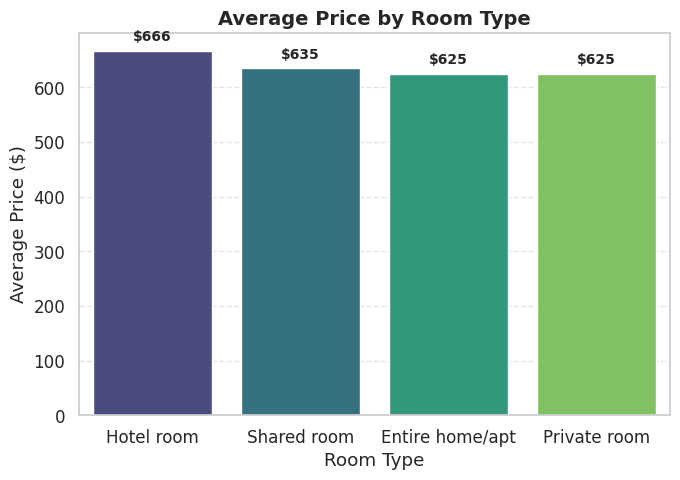

In [70]:
plt.figure(figsize=(7,5))
avg_price = df.groupby('room type')['price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')

for i, value in enumerate(avg_price.values):
    plt.text(i, value + (value*0.02), f"${value:.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Average Price by Room Type", fontsize=14, fontweight='bold')
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**10. Price Distribution by Neighbourhood Group**

/tmp/ipython-input-3017976833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood group', y='price', data=df, palette="cubehelix")


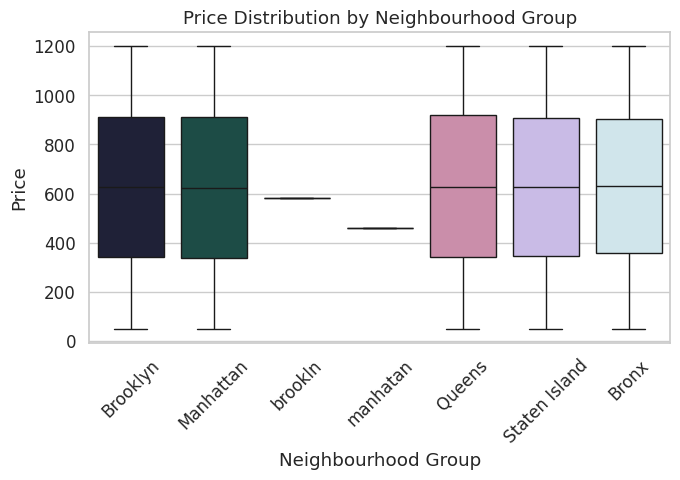

In [62]:
plt.figure(figsize=(7,5))
sns.boxplot(x='neighbourhood group', y='price', data=df, palette="cubehelix")
plt.title("Price Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()